# Tidal Gauge comparison

In [1]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import os
import numpy as np
import netCDF4 as nc
import xarray as xr
import datatree as dt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from sithom.plot import plot_defaults, label_subplots, lim
from tcpips.constants import DATA_PATH, FIGURE_PATH
from adforce.mesh import xr_loader
plot_defaults()

In [3]:
from adforce.mesh import filter_mesh

In [4]:
fm = filter_mesh()

/work/n01/n01/sithom/miniconda3/lib/python3.10/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


'xr_loader'  5.45574 s 

'filter_mesh'  5.53493 s 



In [5]:
fm

<xarray.Dataset>
Dimensions:      (time: 1008, node: 1899, mesh: 1, nope: 1, neta: 103,
                  nbou: 59, nvel: 4514, nele: 3205, nvertex: 3)
Coordinates:
  * time         (time) datetime64[ns] 2014-04-29T00:10:00 ... 2014-05-06
    x            (node) float64 -91.45 -91.21 -91.66 ... -87.42 -87.42 -87.43
    y            (node) float64 28.61 28.63 28.61 28.61 ... 30.47 30.48 30.48
Dimensions without coordinates: node, mesh, nope, neta, nbou, nvel, nele,
                                nvertex
Data variables:
    adcirc_mesh  (mesh) int32 ...
    nvdll        (nope) int32 ...
    max_nvdll    int32 ...
    ibtypee      (nope) int32 ...
    nbdv         (neta) int32 ...
    nvell        (nbou) int32 ...
    max_nvell    int32 ...
    ibtype       (nbou) int32 ...
    nbvv         (nvel) int32 ...
    depth        (node) float64 ...
    zeta         (time, node) float64 ...
    element      (nele, nvertex) int64 17 26 44 18 45 ... 1092 1091 994 1092 993
Attributes: (12/49)
    _FillValue:         -99999.0
    model:              ADCIRC
    version:            022ef7c
    grid_type:          Triangular
    description:        ADCIRC Example     ! 32 CHARACTER ALPHANUMERIC RUN DE...
    agrid:              eastcoast_95d_ll_select.grd
    ...                 ...
    sfea0:              29.000000000000004
    cf:                 0.0
    eslm:               50.0
    cori:               0.0
    ntif:               8
    nbfr:               8

In [30]:
from adforce.mesh import select_edge_indices

In [7]:
from src.constants import NEW_ORLEANS

In [31]:
indices = select_edge_indices(fm, NEW_ORLEANS.lon, NEW_ORLEANS.lat, number=10, verbose=True)

Central point -90.0715 29.9511
Distances [-3.69664923 -3.04899336 -4.32351515 ... -7.29736765 -7.32342357
 -7.2765736 ]
Nearby indices [1800 1799 1785 1784 1783 1761 1760 1759  483 1782] 10
'select_edge_indices'  0.00157 s 



In [14]:
NEW_ORLEANS.lon, NEW_ORLEANS.lat

(-90.0715, 29.9511)

In [18]:
x = NEW_ORLEANS.lon
y = NEW_ORLEANS.lat

In [23]:
xs = fm.x.values
xs

array([-91.445702, -91.21136 , -91.661757, ..., -87.420708, -87.417966,
       -87.426192])

In [20]:
ys = fm.y.values
ys

array([28.6064  , 28.628333, 28.611474, ..., 30.471359, 30.482307,
       30.479228])

In [21]:
ys-y

array([-1.3447  , -1.322767, -1.339626, ...,  0.520259,  0.531207,
        0.528128])

In [24]:
xs-x

array([-1.374202, -1.13986 , -1.590257, ...,  2.650792,  2.653534,
        2.645308])

In [26]:
sqd = (xs-x)**2 + (ys-y)**2
sqd

array([3.69664923, 3.04899336, 4.32351515, ..., 7.29736765, 7.32342357,
       7.2765736 ])

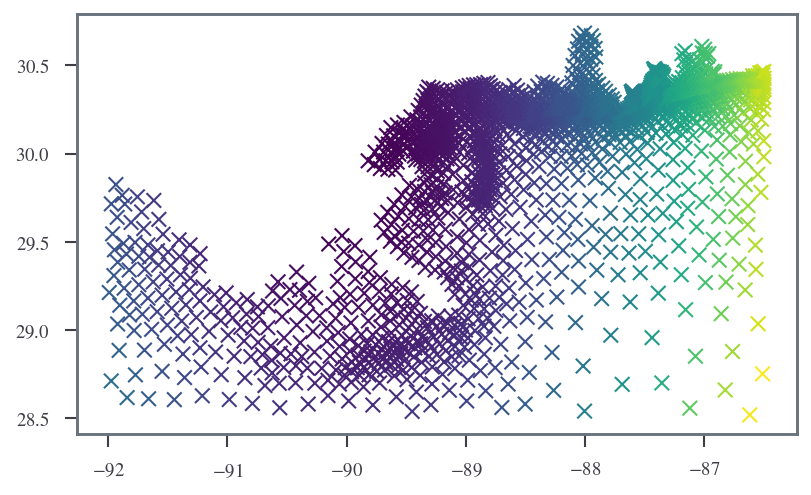

In [32]:
plt.scatter(xs, ys, c=sqd, marker="x")

In [33]:
def plot(ds):
    plt.triplot(ds.x.values, ds.y.values, ds.element.values -1)

Text(0.5, 0, 'Longitude [$^\\circ$E]')

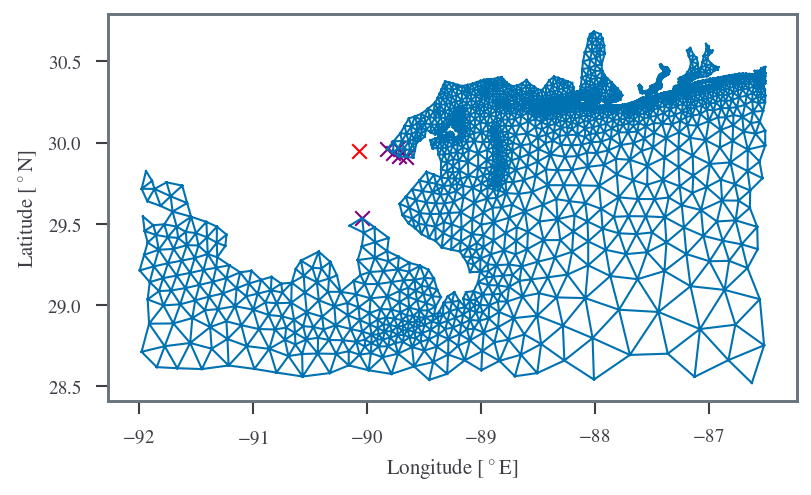

In [34]:
plot(fm)
cc = fm.isel(node=indices)
plt.scatter(NEW_ORLEANS.lon, NEW_ORLEANS.lat, marker="x", color="red")
plt.scatter(cc.x, cc.y, marker="x", color="purple")
plt.ylabel("Latitude [$^\circ$N]")
plt.xlabel("Longitude [$^\circ$E]")

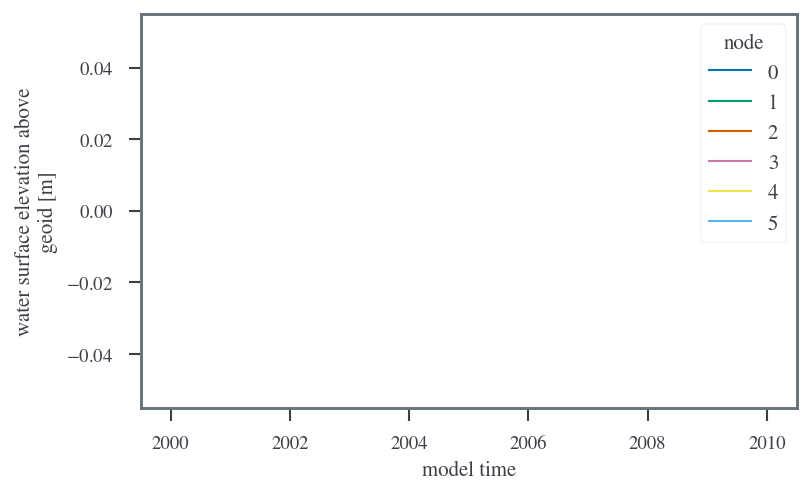

In [37]:
cc.zeta.plot.line(x="time")

In [39]:
cc.zeta.values

array([[nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       ...,
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan]])

In [40]:
fm.zeta.values